# Hausaufgabe 4
## Schallerzeugung durch einen umströmten Zylinder (Teil 1)
<!-- Lizensiert unter (CC BY 2.0) Gert Herold, 2020 -->

Bei der Umströmung eines zylindrischen Körpers bilden sich hinter diesem häufig [Wirbelstraßen](https://de.wikipedia.org/wiki/K%C3%A1rm%C3%A1nsche_Wirbelstra%C3%9Fe) aus.
Je nach Medium, Strömungsgeschwindigkeit und Durchmesser des Zylinders können die gegenläufigen Wirbel wahrnehmbare Töne verursachen.

Hier soll basierend auf experimentellen Daten untersucht werden, wie die erzeugten Töne von der Strömungsgeschwindigkeit abhängen.
In einem Windkanal wurden zu diesem Zweck die Schallabstrahlung eines Zylinder mit 6 mm Durchmesser bei ~~15~~ 13 verschiedenen Geschwindigkeiten zwischen ca. $8$ und $50\,\frac{\text{m}}{\text{s}}$   gemessen und das Ergebnis in WAV-Dateien abgespeichert.

**1) Laden Sie die Schalldruck-Zeitdaten aus den WAV-Dateien und extrahieren Sie die jeweils zugehörige Strömungsgeschwindigkeit in $\frac{\text{m}}{\text{s}}$ automatisiert aus den Dateinamen. Plotten Sie die Daten für alle Geschwindigkeiten mit korrekten [x-Achsenbeschriftung](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html) und [Kenn](https://stackoverflow.com/questions/25239933/how-to-add-title-to-subplots-in-matplotlib)[zeichung](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.text.html) der Geschwindigkeit in getrennt untereinanderliegenden Diagrammen.**

*Hinweise:*
  * *WAV-Dateien enthalten [digitalisierte Zeitdaten](https://de.wikipedia.org/wiki/Puls-Code-Modulation), z.B. können damit mit Mikrofonen aufgezeichnete zeitliche Schwankungen des Luftdrucks (Schall) abgespeichert werden.*
  * *Die WAV-Daten sind als Integer-Werte gespeichert. Um daraus z.B. Schalldrücke zu berechnen, müsste bekannt sein, welchem Schalldruckwert der maximale Integerwert entspricht. In dieser Aufgabe sind jedoch diesbezüglich nur Relativ-Werte von Interesse, sodass auf eine entsprechende Umrechnung verzichtet werden kann.*
  * *Die zeitliche Zuordnung der Werte hingegen muss exakt geschehen, wofür die [Abtastrate](https://de.wikipedia.org/wiki/Abtastrate), die in WAV-Dateien mit abgespeichert ist, bekannt sein muss.*
  * *Als Dezimaltrennzeichen wurde für die Geschwindigkeit im Dateinamen ein "o" verwendet, um Probleme mit der Identifikation der Dateiendung zu vermeiden.*

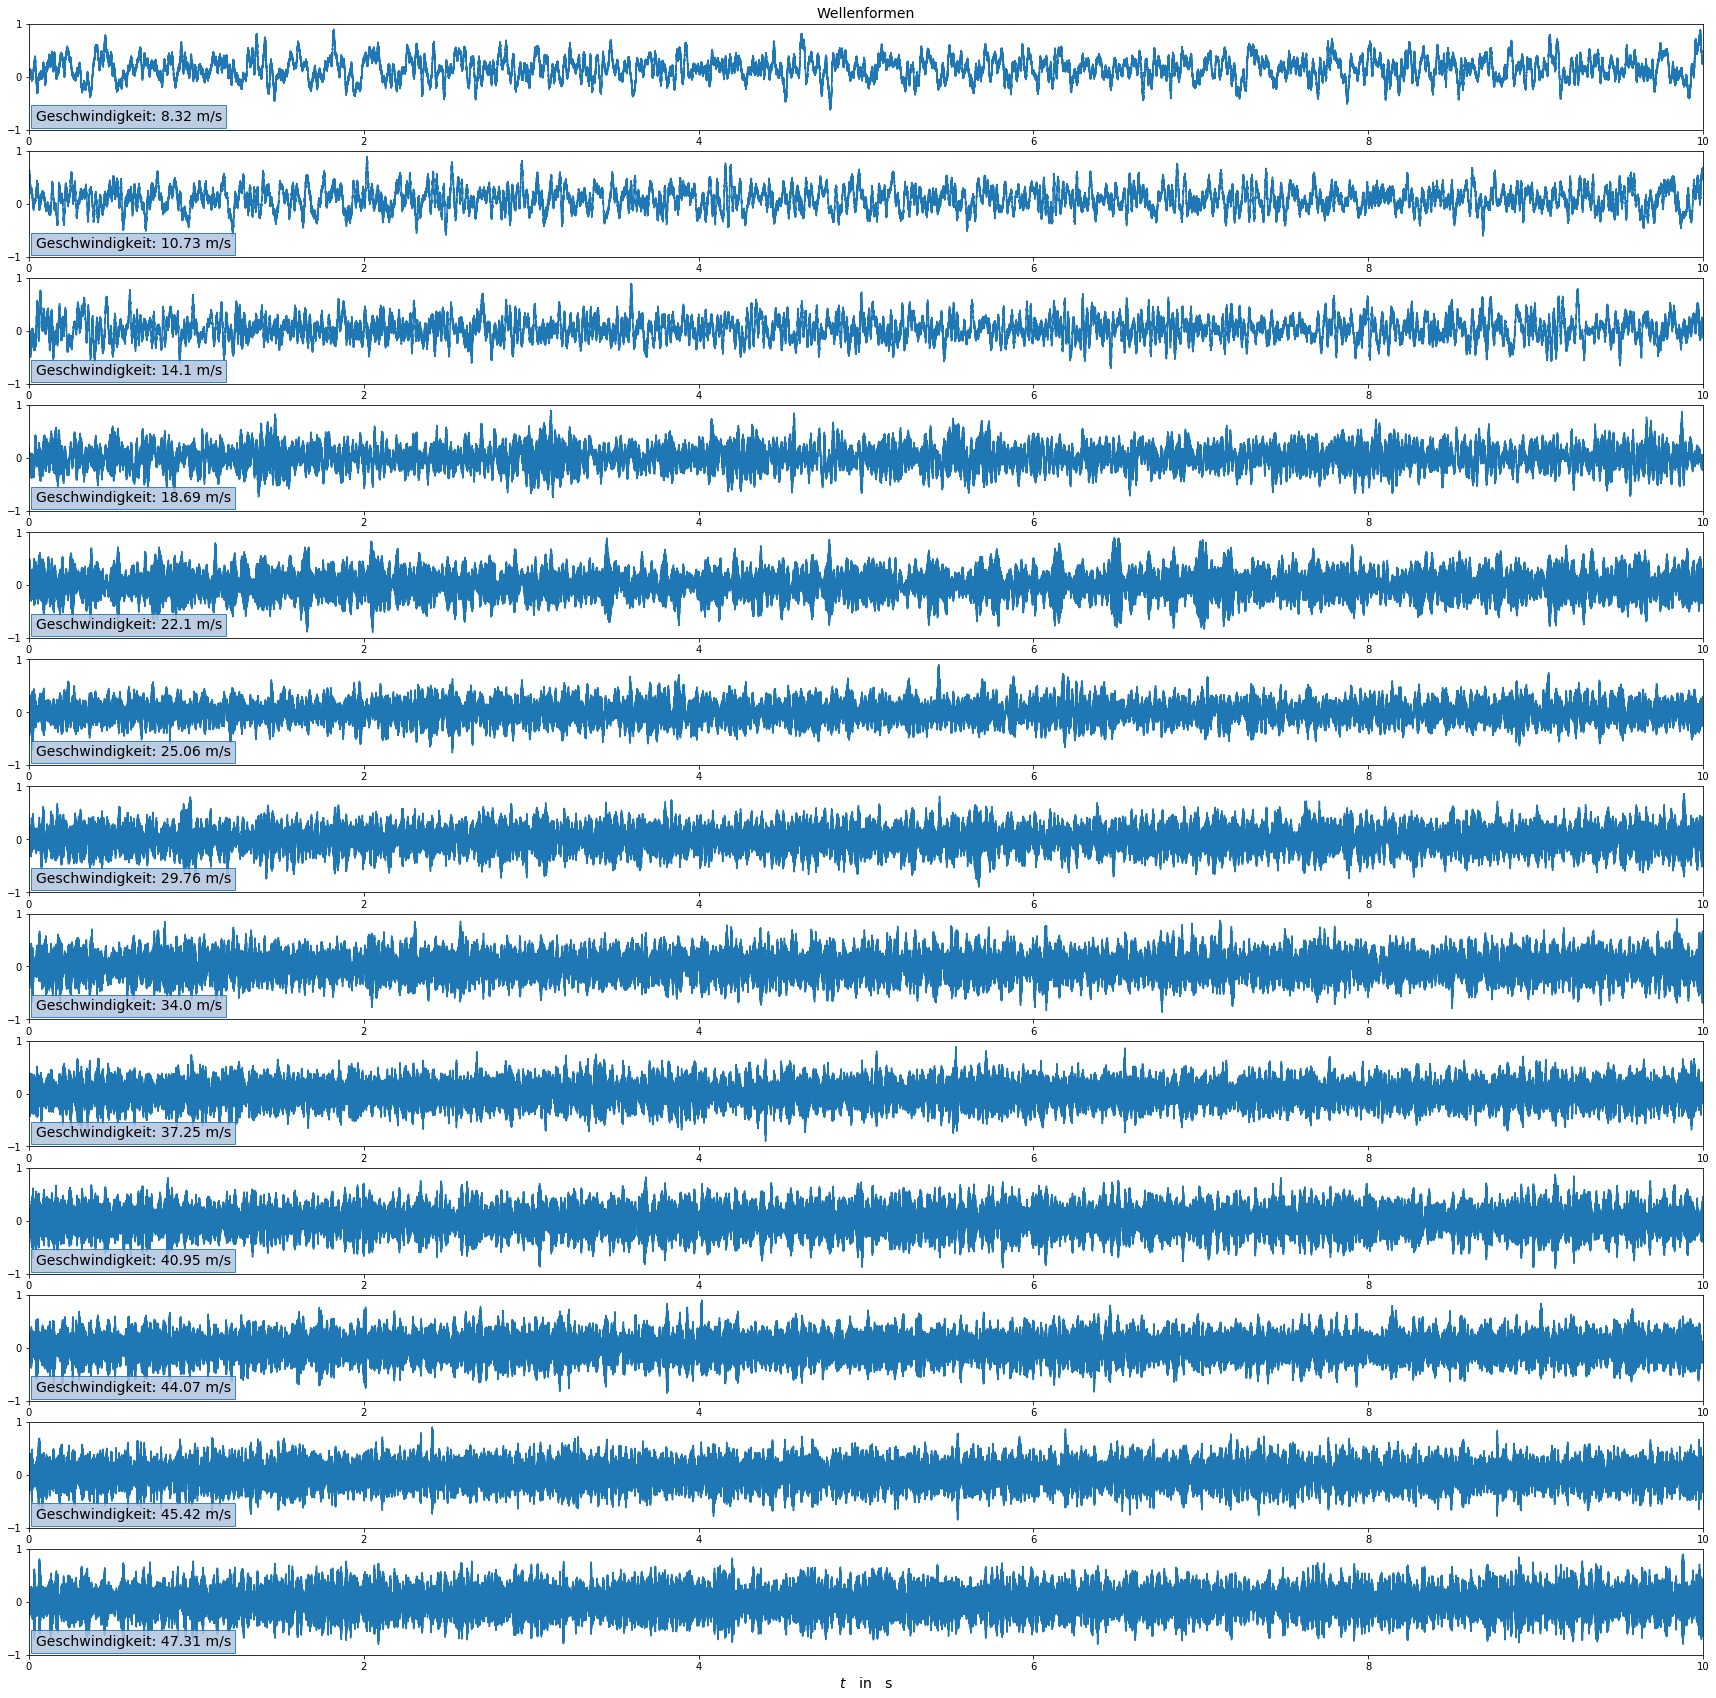

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile as wf
import os

# Dictionarys für Font und Box Style
font_style = {'family': 'sans',
              'color':  'black',
              'weight': 'normal',
              'size': 14}

bbox_style = {'boxstyle': 'square',
              'ec': 'tab:blue',
              'fc': 'lightsteelblue',
              'alpha': 0.85}

# Pfad zu den Dateien
path = 'audio'
# Dateienpfad lesen und Liste mit Dateien erstellen
file_list = os.listdir(path)

# Initialisierung der Listen für die Geschwindigkeiten, Samplerates und Waveform-Daten
speed_list = []
rate_list = []
data_list = []

# for-Schleife um über die Dateiliste zu iterieren
for file in file_list:
    # Aus Dateiname die Geschwindigkeit ablesen, Dateinamen ist im festen Format, o mit Dezimaltrennzeichen ersetzen, an die Liste für Geschwindigkeiten hängen.
    speed_list.append(float(file[6:11].replace('o', '.')))
    
    # Datei lesen, Spamplerate und Waveform-Daten in Variablen speichern
    r, d = wf.read(os.path.join(path, file))
    # Waveform-Daten auf -1...1 normalisieren, nicht unbedingt nötig
    d = np.round(d / 32768, 5)
    # Samplerate und Waveform-Daten an jeweilige Listen anhängen
    rate_list.append(r)
    data_list.append(d)

# Figure für Plot mit geeigneter Größe initialisieren
plt.figure(1, figsize=(30, 30))

# for-Schleife über die Listen für die Geschwindigkeiten, Samplerates und Waveform-Daten für Subplots
for i, (data, rate, speed) in enumerate(zip(data_list, rate_list, speed_list)):
    # Subplot mit Laufindex
    plt.subplot(len(rate_list), 1, i + 1)
    # Titel über den ersten Subplot und somit über allen Subplots setzen
    if i == 0: plt.title('Wellenformen', fontsize=14)
    # Zeitvektor erstellen
    t = np.linspace(0, len(data)/rate, len(data))
    # Wellenformdaten plotten
    plt.plot(t, data)
    
    # Plotformatierung
    plt.xlim([0, len(data) / rate])
    plt.ylim([-1, 1])
    plt.yticks([-1, 0, 1])
    plt.text(0.04, -0.825, 'Geschwindigkeit: {} m/s'.format(speed), font_style, bbox=bbox_style)

# X-Achsenbeschriftung für aktuellen und somit letzten Subplot setzen, da alle x-Achsen die gleiche Beschriftung haben
plt.xlabel('$t\mathrm{\quadin\quads}$', fontsize=14);

Um aus den Zeitdaten $p(t)$ Informationen über die darin enthaltenen Töne zu ermitteln, ist es sinnvoll, aus den Datensätzen jeweils ein Spektrum $p(f)$ zu berechnen. 
Dies geschieht allgemein über eine [Fourier-Transformation](https://de.wikipedia.org/wiki/Fourier-Transformation) bzw. für diskret abgetastete Werte mittels einer [Diskreten Fourier-Transformation](https://de.wikipedia.org/wiki/Diskrete_Fourier-Transformation) (DFT). Für reellwertige Signale ist diese z.B. im Modul [*numpy.fft*](https://docs.scipy.org/doc/numpy/reference/routines.fft.html) mit der Funktion [*rfft()*](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.rfft.html) implementiert.

**2) Berechnen Sie die Spektren (Amplitudenquadrat über Frequenz) aller Zeitsignale und stellen Sie sie in einem gemeinsamen Diagramm dar:**

  * Berechnen Sie das Betragsquadrat $|p(f)|^2$ für die einzelnen Werte.
  * Stellen Sie diese nur für Frequenzen [bis](https://docs.scipy.org/doc/numpy/reference/generated/numpy.searchsorted.html) 2500 Hz dar. Beschriften Sie die x-Achse korrekt.
  * Um den ggf. verdeckten Verlauf einiger Spektren sichtbar zu machen, setzen Sie den Parameter *alpha* der Plotfunktion auf einen Wert kleiner als 1.
  * Wählen Sie eine ausreichende Größe der Abbildung.
  * Stellen Sie die y-Achse mit logarithmischer Skalierung dar.
  * Fügen Sie der Abbildung eine Legende hinzu, damit die jeweiligen Spektren zuordenbar sind.
  
*Hinweis: Die zugehörigen Frequenzen lassen sich mithilfe der Funktion [rfftfreq()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.rfftfreq.html) berechnen. 
Anzahl der Samples sowie Abtastrate sind bereits aus Aufgabenteil 1 bekannt.*

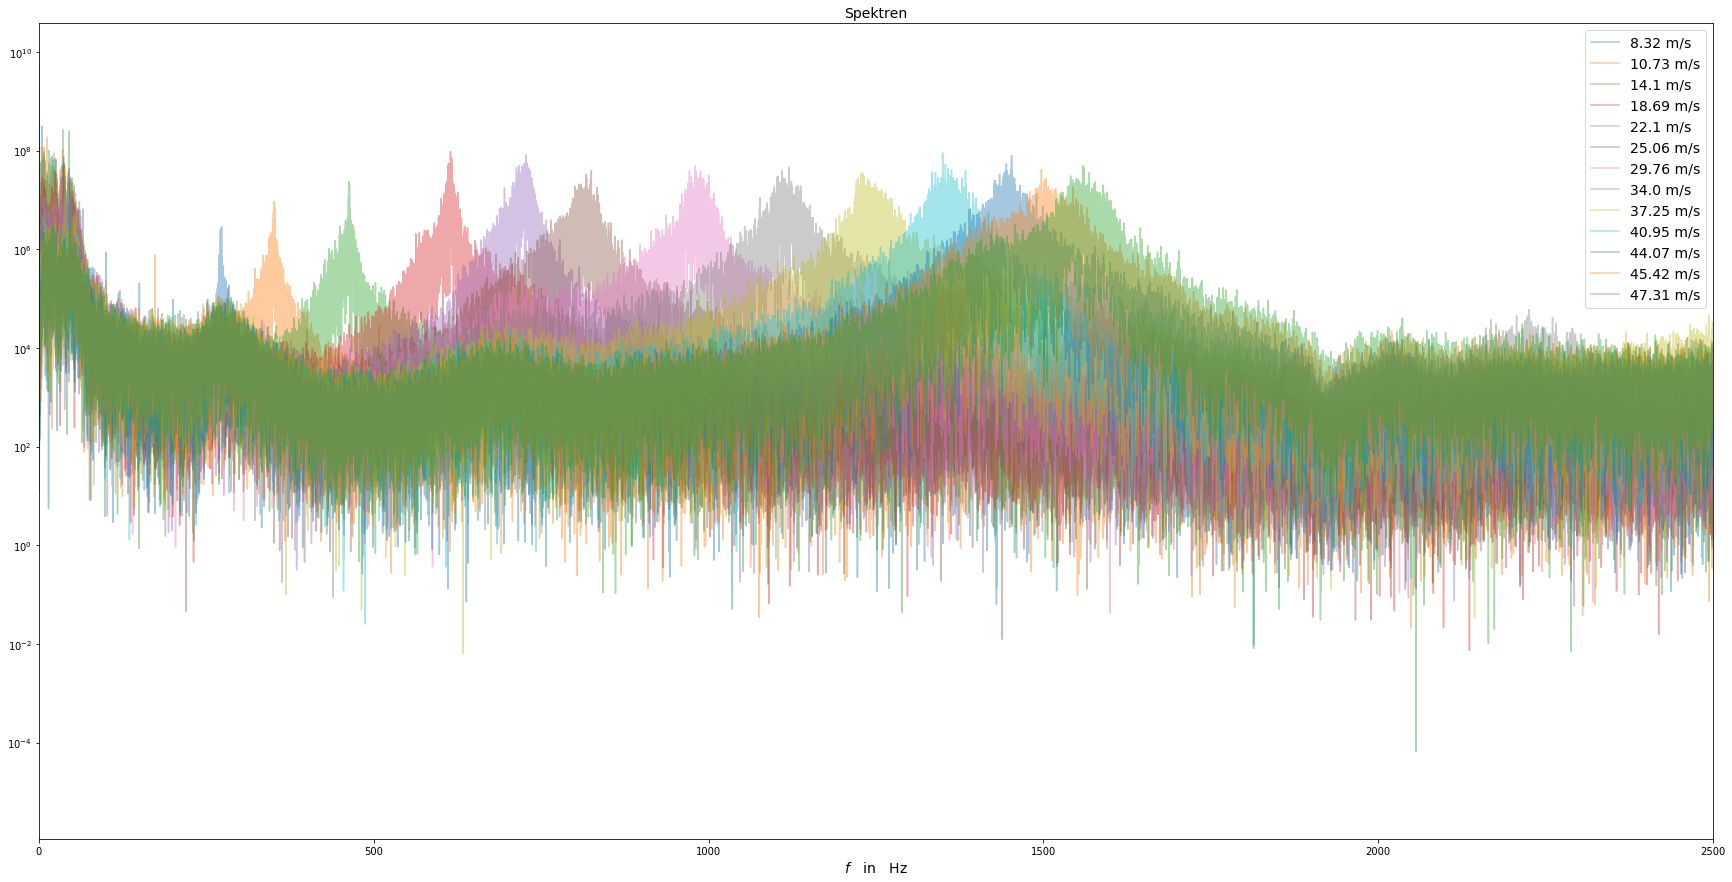

In [2]:
# Figure für Plot mit geeigneter Größe initialisieren und Titel setzen
plt.figure(2, figsize=(30, 15))
plt.title('Spektren', fontsize=14)

# Initialisierung der Listen für die FFT-Daten und FFT-Frequenzen
fft_data_list = []
fft_freq_list = []

# for-Schleife über die Listen für die Geschwindigkeiten, Samplerates und Waveform-Daten für Subplots
for data, rate, speed in zip(data_list, rate_list, speed_list):
    # Berechnung der komplexwertigen Fouriertransformation
    fft_complex = np.fft.rfft(data)
    # Anhängen des Betrags der Fouriertransformation an die entpsrechende Liste 
    fft_data_list.append(np.abs(fft_complex) ** 2)
    # Anhängen der berechneten FFT-Frequenzen an die entsprechende Liste
    fft_freq_list.append(np.fft.rfftfreq(len(data), 1. / rate))
    
    # Plotten des Betrags der FFT über die Frequenzen der FFT, letzter Eintrag der Liste nimmt den zuletzt hinzugefügten Eintrag
    plt.semilogy(fft_freq_list[-1], fft_data_list[-1], alpha=0.4, label='{} m/s'.format(speed))

# Plotformatierung
plt.xlabel('$f\mathrm{\quadin\quadHz}$', fontsize=14)
plt.legend(loc='upper right', fontsize=14)
plt.xlim([0, 2500]);

**3) Finden Sie für jede Strömungsgeschwindigkeit den jeweils markanten Ton (d.h. den Maximalwert im Spektrum).**
  * Vernachlässigen Sie in Ihrer Betrachtung Frequenzen unter 100 Hz.
  * Geben Sie die charakteristische Frequenz $f$ für jede Geschwindigkeit $v$ in übersichtlicher Form aus, z.B.: `v:  0.00 m/s,    f:    0.0 Hz`

In [3]:
# Initialisierung der Liste für die maximalen Frequenzen
max_freq_list = []

# Startfrequenz für das Suchen der Maximas
start_freq = 100

# for-Schleife über den FFT-Betrag und den FFT-Frequenzen
for fft_data, fft_freq in zip(fft_data_list, fft_freq_list):
    # Index der Startfrequenz in der Liste für die Frequenzen suchen
    start_freq_index = np.searchsorted(fft_freq, start_freq)
    # Index des Maximalwertes des FFT-Betrags, von 100Hz bis zum letzten Eintrag, da untersuchtes Array neue Indizies hat, muss um den Startwert korrigiert werden
    index = np.argmax(fft_data[start_freq_index:]) + start_freq_index
    # Entsprechende Frequenz aus den FFT-Frequenzen an die Liste der maximalen Frequenzen anhängen
    max_freq_list.append(fft_freq[index])

# for-Schleife über die Geschwindigkeiten und die maximalen Frequenzen zur Ausgabe
for speed, max_freq in zip(speed_list, max_freq_list):
    print('v: {:>6.2f} m/s,     f: {:>6.1f} Hz'.format(speed, max_freq))

v:   8.32 m/s,     f:  272.8 Hz
v:  10.73 m/s,     f:  351.7 Hz
v:  14.10 m/s,     f:  463.0 Hz
v:  18.69 m/s,     f:  614.7 Hz
v:  22.10 m/s,     f:  727.2 Hz
v:  25.06 m/s,     f:  825.0 Hz
v:  29.76 m/s,     f:  980.2 Hz
v:  34.00 m/s,     f: 1120.1 Hz
v:  37.25 m/s,     f: 1227.6 Hz
v:  40.95 m/s,     f: 1349.7 Hz
v:  44.07 m/s,     f: 1452.6 Hz
v:  45.42 m/s,     f: 1497.1 Hz
v:  47.31 m/s,     f: 1559.2 Hz


Es soll angenommmen werden, dass ein annähernd linearer Zusammenhang der beiden Größen $v$ und $f$ besteht. 
Um diesen zu ermitteln, soll daher eine [Regressionsgerade](https://de.wikipedia.org/wiki/Lineare_Einfachregression) berechnet werden.
Eine Gerade im zweidimensionalen Raum ist definiert durch 2 Parameter $a, b$:
$$
f = a\,v + b
$$

Die Koeffizienten $a$ und $b$ der Regressionsgerade berechnen sich über:

$$
a=\frac{\sum_{i=1}^{N} (v_i - \overline v)(f_i - \overline f)}{\sum_{i=1}^{N}(v_i - \overline v)^2}\\
b=\overline f - a\,\overline v
$$

**4) Schreiben Sie eine Funktion *ab()*, die für beliebige, gleich lange Arrays *v* und *f* die Geraden-Parameter *a* und *b* berechnet und zurückgibt.**

In [4]:
# Funktion zur Berechung der Parameter a und b der Regressionsgeraden durch die Datenpaare aus v und f.
def ab(v,f):
    # Berechnung der Durchschnittswerte von v und f
    mean_v, mean_f = np.mean(v), np.mean(f)
    # Berechnung des Zählers
    num = np.sum((v - mean_v) * (f - mean_f))
    # Berechnung des Nenners
    den = np.sum((v - mean_v) ** 2)
    
    # Berechnung von a und b
    a = num / den
    b = mean_f - a * mean_v
    
    return a, b

**5) Wenden Sie die Funktion auf die Wertepaare aus Aufgabenteil 3 an und zeichnen Sie die Regressionsgerade (als Linie) zusammen mit den Ausgangswerten (als Punkte) in ein Diagramm.**
  * Achten Sie auf korrekte Achsenbeschriftungen.
  * Geben Sie außerdem an, welche charakteristischen Töne bei $v=15\,\frac{\text{m}}{\text{s}}$, $v=42\,\frac{\text{m}}{\text{s}}$ und $v=50\,\frac{\text{m}}{\text{s}}$ zu erwarten wären.
  * Zeichnen Sie die Abweichung der gemessenen Werte zur Regressionsgerade in ein separates Diagramm.
  * Wie groß sind Mittelwert und Standardabweichung dieser Abweichungen?

Für 15 m/s ist der charakteristische Ton  492.9 Hz.
Für 42 m/s ist der charakteristische Ton 1384.2 Hz.
Für 50 m/s ist der charakteristische Ton 1648.3 Hz.


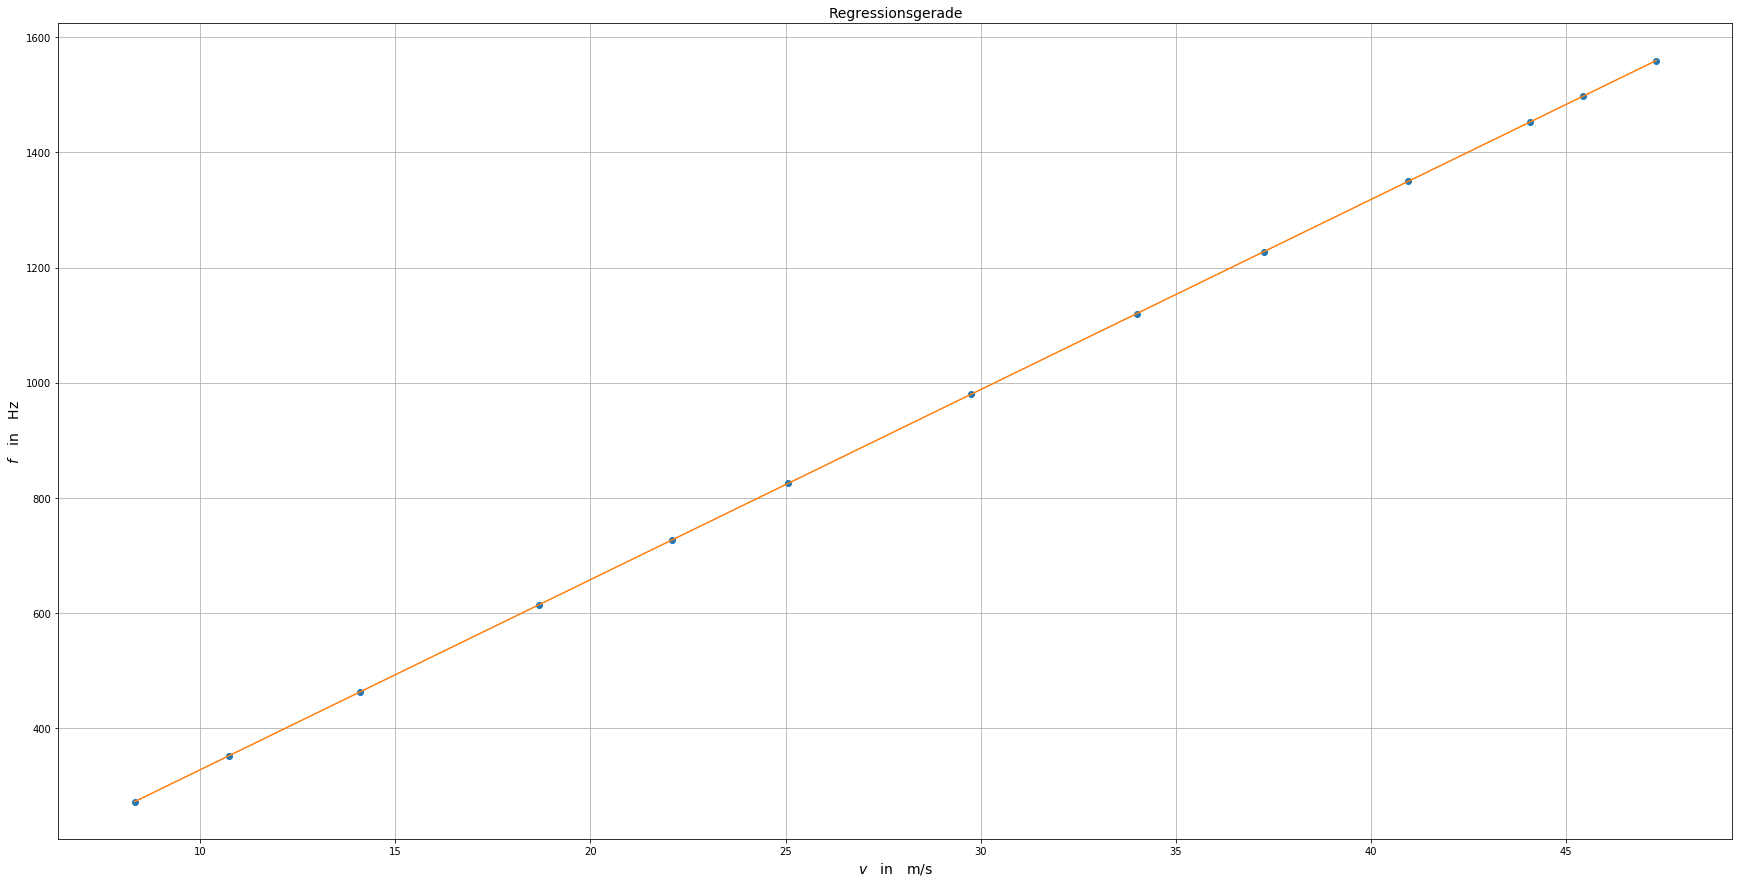

In [5]:
# Berechnung der Parameter a und b der Regressionsgeraden
m, b = ab(speed_list, max_freq_list)
# Erstellung der x-Werte: erster und letzter Punkt der Geschwindigkeiten reichen, da es eine Gerade ist
x = np.array(speed_list)
# Berechnung der beiden y-Werte nach der zuvor gefundenen Regressionsgeraden
y = m * x + b

v_list = np.array([15, 42, 50])
for v in v_list:
    print('Für {} m/s ist der charakteristische Ton {:>6.1f} Hz.'.format(v, m * v +  b))

# Figure für Plot mit geeigneter Größe initialisieren und Titel setzen
plt.figure(3, figsize=(30, 15))
plt.title('Regressionsgerade', fontsize=14)
# Plotten der Geschwindigkeiten und maximalen Frequenzen als Punkte
plt.plot(speed_list, max_freq_list, 'o')
# Plotten der Regressionsgeraden
plt.plot(x, y)
# Plotformatierung
plt.xlabel('$v\mathrm{\quadin\quadm/s}$', fontsize=14)
plt.ylabel('$f\mathrm{\quadin\quadHz}$', fontsize=14)
plt.grid();

Der Mittelwert der Abweichungen ist 0.00 Hz.
Die Standardabweichung der Abweichungen ist 0.19 Hz.


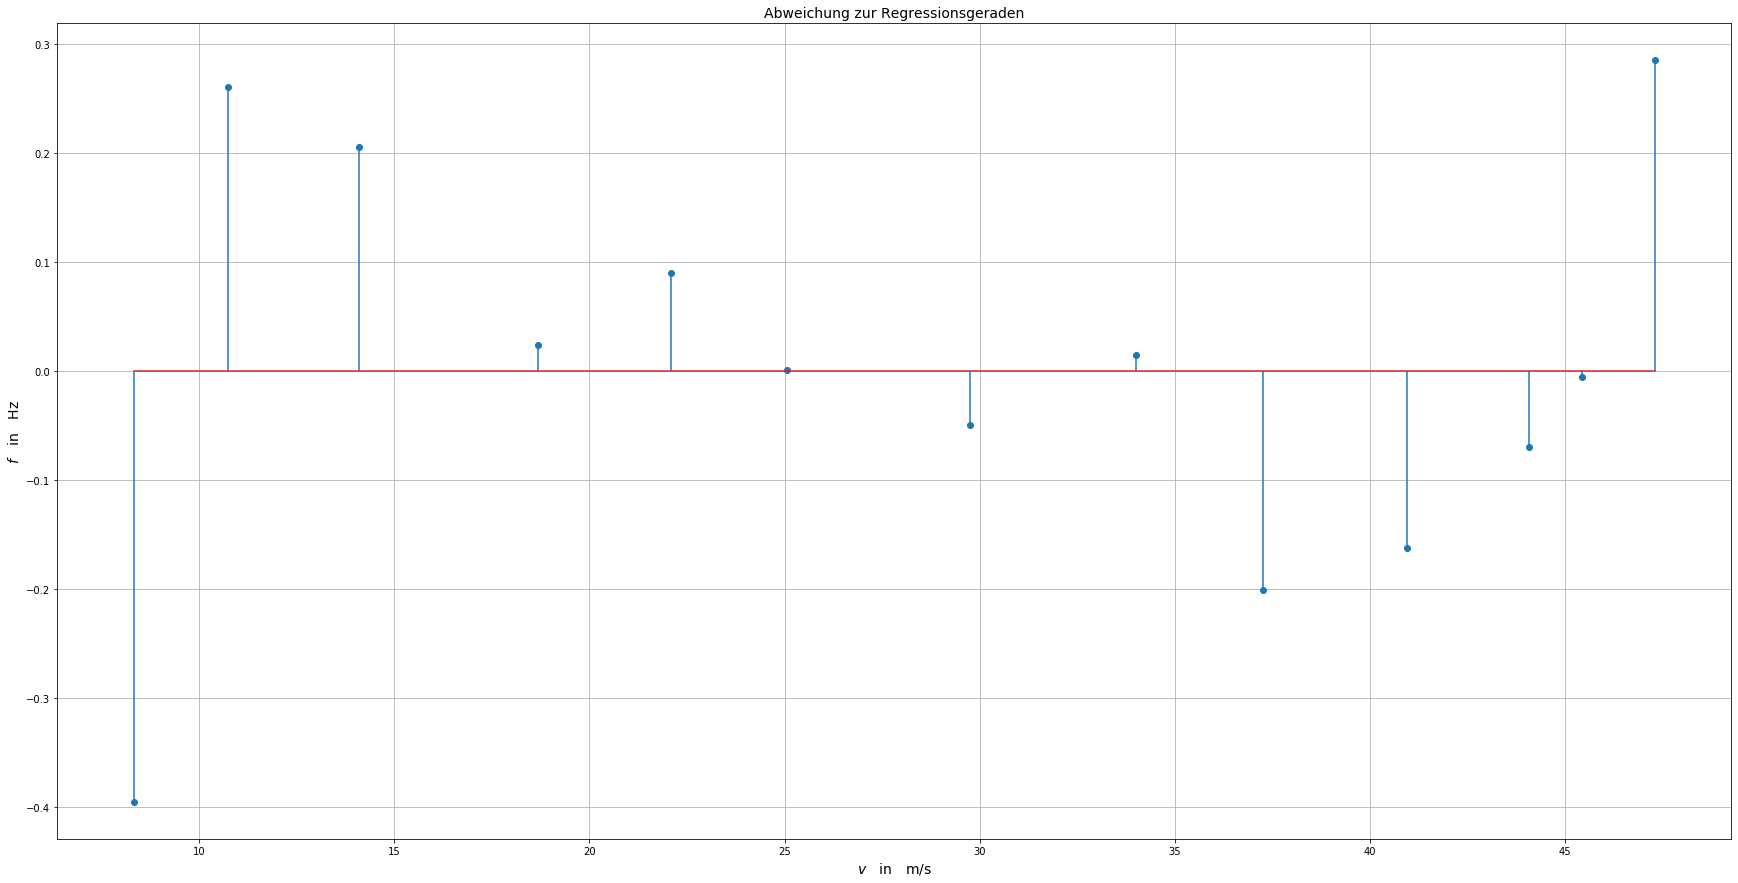

In [6]:
# Berechnung der Differenzen zwischen gemessenem Wert und dem entsprechenden Wert der Regression gerade
diff_list = y - np.array(max_freq_list)

# Figure für Plot mit geeigneter Größe initialisieren und Titel setzen
plt.figure(4, figsize=(30, 15))
plt.title('Abweichung zur Regressionsgeraden', fontsize=14)

# Stemplot der Differenzen
plt.stem(x, diff_list, use_line_collection=True)

# Plotformatierung
plt.xlabel('$v\mathrm{\quadin\quadm/s}$', fontsize=14)
plt.ylabel('$f\mathrm{\quadin\quadHz}$', fontsize=14)
plt.grid();

# Berechnung des Mittelwertes und der Standardabweichung mit Korrekturfaktor der Differenzen
mean_diff = np.mean(diff_list)
std_diff = np.std(diff_list, ddof=1)
print('Der Mittelwert der Abweichungen ist {:.2f} Hz.'.format(mean_diff))
print('Die Standardabweichung der Abweichungen ist {:.2f} Hz.'.format(std_diff))